In [52]:
import pandas as pd
import jax.numpy as jnp
import numpy as np
from causaltensor.cauest import MC_NNM_with_cross_validation

In [53]:
!curl https://github.com/TianyiPeng/causaltensor/raw/main/tutorials/Synth.zip -L -o Synth.zip
!unzip -o Synth.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6868  100  6868    0     0  10118      0 --:--:-- --:--:-- --:--:-- 10118
Archive:  Synth.zip
  inflating: synth_code.m            
  inflating: readme_synth_matlab.txt  
  inflating: MLAB_data.txt           
  inflating: loss_function.m         


In [54]:
O_raw = np.loadtxt('MLAB_data.txt')
O = O_raw[8:, :] ## remove features that are not relevant in this demo
O = O.T

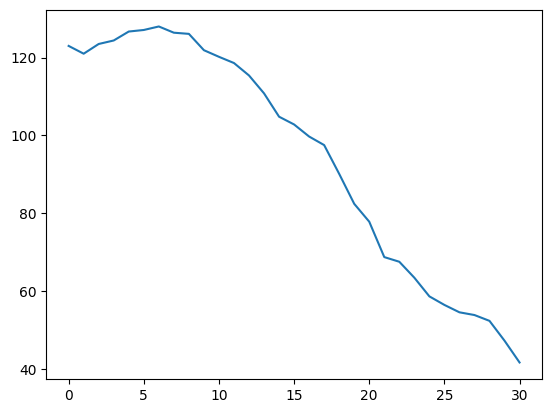

In [55]:
import matplotlib.pyplot as plt

plt.plot(O[-1, :])

In [56]:
  Z = np.zeros_like(O) # Z has the same shape as O
  Z[-1, 19:] = 1 #Only California (the last row) used the intervention, which started in 1989

In [57]:
O

array([[ 89.80000305,  95.40000153, 101.0999985 , ..., 106.1999969 ,
        100.6999969 ,  96.19999695],
       [100.3000031 , 104.0999985 , 103.9000015 , ..., 109.5       ,
        104.8000031 ,  99.40000153],
       [124.8000031 , 125.5       , 134.3000031 , ...,  81.19999695,
         79.59999847,  73.        ],
       ...,
       [106.4000015 , 105.4000015 , 108.8000031 , ...,  88.69999695,
         84.40000153,  80.09999847],
       [132.1999969 , 131.6999969 , 140.        , ..., 102.9000015 ,
        104.8000031 ,  90.5       ],
       [123.        , 121.        , 123.5       , ...,  52.29999924,
         47.20000076,  41.59999847]], shape=(39, 31))

In [58]:
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]], shape=(39, 31))

In [59]:
M, a, b, tau = MC_NNM_with_cross_validation(O, 1-Z)

/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: divide by zero encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: overflow encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: invalid value encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:20: RuntimeWarning: divide by zero encountered i

In [60]:
M_broadcasted = M + a + b.T
M_broadcasted

array([[ 93.2497022 ,  97.52192686, 100.35838766, ..., 103.05166255,
         98.44589062,  95.0333005 ],
       [102.37124087, 104.64654957, 105.10474358, ..., 107.52822072,
        103.24344936, 100.59110725],
       [122.60399891, 125.62511774, 132.30752756, ...,  82.6952723 ,
         80.37364544,  74.26929255],
       ...,
       [103.66460803, 105.94381582, 108.10116343, ...,  88.83986896,
         86.05631748,  81.15903311],
       [130.57848977, 131.91925197, 141.45209842, ..., 104.73486783,
        102.81612802,  94.33834233],
       [116.91094251, 119.86130346, 124.63742444, ...,  80.01314942,
         78.37382431,  71.3764984 ]], shape=(39, 31))

In [61]:
O

array([[ 89.80000305,  95.40000153, 101.0999985 , ..., 106.1999969 ,
        100.6999969 ,  96.19999695],
       [100.3000031 , 104.0999985 , 103.9000015 , ..., 109.5       ,
        104.8000031 ,  99.40000153],
       [124.8000031 , 125.5       , 134.3000031 , ...,  81.19999695,
         79.59999847,  73.        ],
       ...,
       [106.4000015 , 105.4000015 , 108.8000031 , ...,  88.69999695,
         84.40000153,  80.09999847],
       [132.1999969 , 131.6999969 , 140.        , ..., 102.9000015 ,
        104.8000031 ,  90.5       ],
       [123.        , 121.        , 123.5       , ...,  52.29999924,
         47.20000076,  41.59999847]], shape=(39, 31))

In [62]:
# Merge the last row of O and M into a new array with shape (2, O.shape[1])
merged_last_rows = np.vstack([O[-1, :], M_broadcasted[-1, :]])
merged_last_rows


array([[123.        , 121.        , 123.5       , 124.4000015 ,
        126.6999969 , 127.0999985 , 128.        , 126.4000015 ,
        126.0999985 , 121.9000015 , 120.1999969 , 118.5999985 ,
        115.4000015 , 110.8000031 , 104.8000031 , 102.8000031 ,
         99.69999695,  97.5       ,  90.09999847,  82.40000153,
         77.80000305,  68.69999695,  67.5       ,  63.40000153,
         58.59999847,  56.40000153,  54.5       ,  53.79999924,
         52.29999924,  47.20000076,  41.59999847],
       [116.91094251, 119.86130346, 124.63742444, 123.58745834,
        124.72635644, 125.26984225, 129.01365827, 127.40715702,
        125.52238868, 122.13371552, 120.29264117, 120.03038952,
        116.96177818, 112.11714124, 105.06179576, 103.00196199,
        100.07405584,  98.65330748,  92.73668191,  89.32095896,
         84.65199665,  81.6352497 ,  80.81546529,  81.1126648 ,
         79.85416308,  80.97155417,  79.67270552,  79.61219442,
         80.01314942,  78.37382431,  71.3764984 ]])

In [ ]:
import pandas as pd

merged_last_rows_df = pd.DataFrame({
    'O_california': merged_last_rows[0],
    'M_california': merged_last_rows[1]
})
merged_last_rows_df

,O_california,M_california
0,123.000000,116.910943
1,121.000000,119.861303
2,123.500000,124.637424
3,124.400002,123.587458
4,126.699997,124.726356
5,127.099998,125.269842
6,128.000000,129.013658
7,126.400002,127.407157
8,126.099998,125.522389
9,121.900002,122.133716


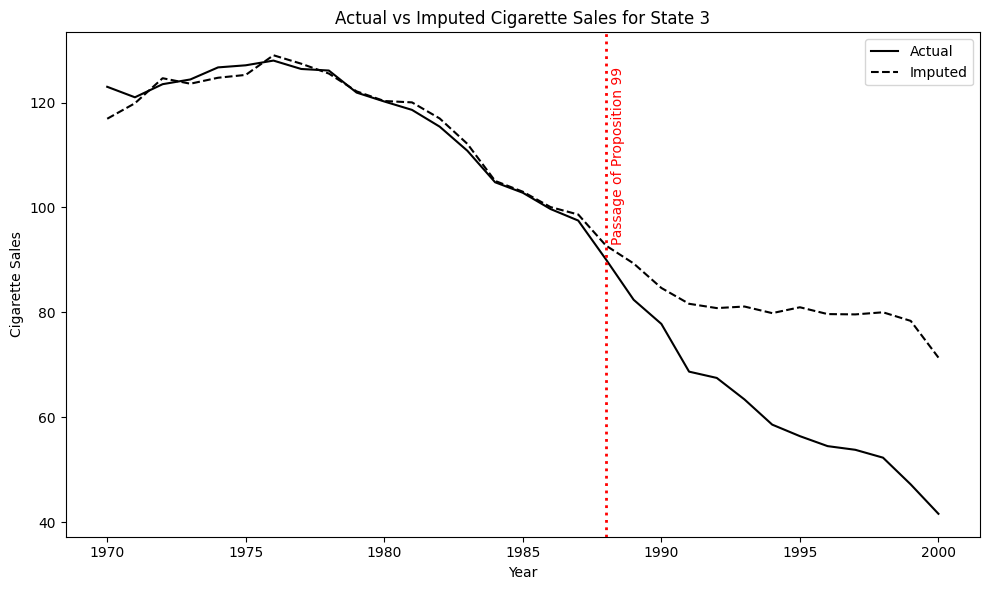

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1970,2001), merged_last_rows_df["O_california"], color='black', label='Actual', linestyle='-')
plt.plot(np.arange(1970,2001), merged_last_rows_df["M_california"], color='black', label='Imputed', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Cigarette Sales')
plt.title('Actual vs Imputed Cigarette Sales for State 3')
plt.legend()
plt.axvline(x=1988, color='red', linestyle=':', linewidth=2)
plt.text(1988 + 0.2, plt.ylim()[1]*0.95, "Passage of Proposition 99", color='red', rotation=90, va='top')
plt.tight_layout()
plt.show()

In [75]:
# Placebo test for State 6 (4)

O_placebo = O[:-1]
Z = np.zeros_like(O_placebo) # Z has the same shape as O
Z[4, 19:] = 1 

In [76]:
M, a, b, tau = MC_NNM_with_cross_validation(O_placebo, 1-Z)
M_broadcasted = M + a + b.T

/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: divide by zero encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: overflow encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: invalid value encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:20: RuntimeWarning: divide by zero encountered i

In [78]:
merged_last_rows = np.vstack([O[4, :], M_broadcasted[4, :]])
merged_last_rows
merged_last_rows_df = pd.DataFrame({
    'O_placebo': merged_last_rows[0],
    'M_placebo': merged_last_rows[1]
})
merged_last_rows_df

,O_placebo,M_placebo
0,155.000000,152.345327
1,161.100006,155.401693
2,156.300003,155.534483
3,154.699997,151.921066
4,151.300003,152.409056
5,147.600006,151.025052
6,153.000000,154.435700
7,153.300003,154.972988
8,155.500000,155.763123
9,150.199997,153.361248


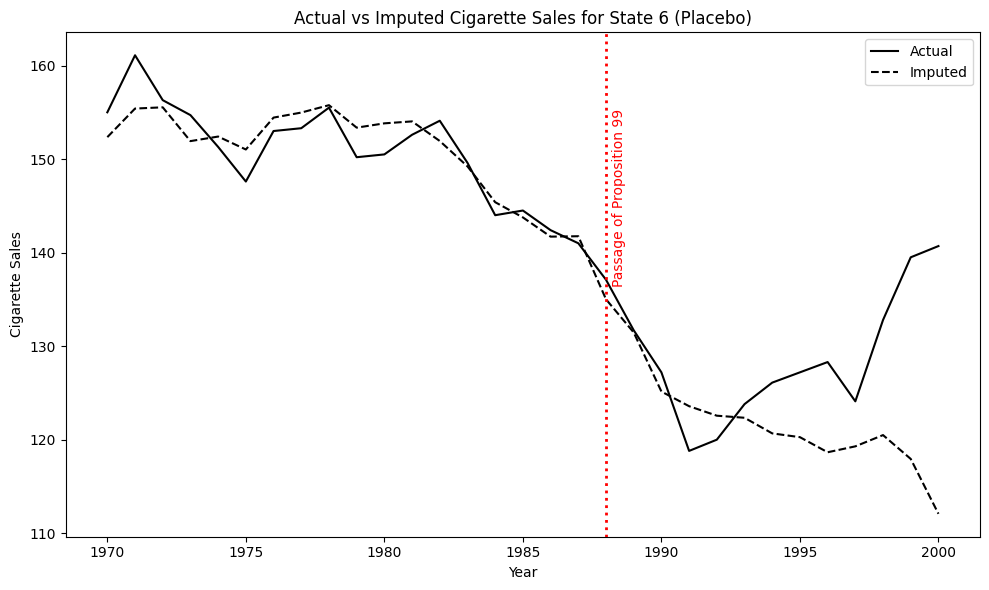

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1970,2001), merged_last_rows_df["O_placebo"], color='black', label='Actual', linestyle='-')
plt.plot(np.arange(1970,2001), merged_last_rows_df["M_placebo"], color='black', label='Imputed', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Cigarette Sales')
plt.title('Actual vs Imputed Cigarette Sales for State 6 (Placebo)')
plt.legend()
plt.axvline(x=1988, color='red', linestyle=':', linewidth=2)
plt.text(1988 + 0.2, plt.ylim()[1]*0.95, "Passage of Proposition 99", color='red', rotation=90, va='top')
plt.tight_layout()
plt.show()

In [80]:
# Placebo test for State 36 (34)
O_placebo = O[:-1]
Z = np.zeros_like(O_placebo) # Z has the same shape as O
Z[34, 19:] = 1

In [82]:
M, a, b, tau = MC_NNM_with_cross_validation(O_placebo, 1-Z)
M_broadcasted = M + a + b.T
merged_last_rows = np.vstack([O[34, :], M_broadcasted[34, :]])
merged_last_rows_df = pd.DataFrame({
    'O_placebo': merged_last_rows[0],
    'M_placebo': merged_last_rows[1]
})
merged_last_rows_df

/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: divide by zero encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: overflow encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: invalid value encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:20: RuntimeWarning: divide by zero encountered i

,O_placebo,M_placebo
0,124.300003,126.064428
1,128.399994,130.800548
2,137.000000,138.313460
3,143.100006,144.092120
4,149.600006,148.641700
5,152.699997,151.893939
6,158.100006,156.134797
7,157.699997,155.863538
8,155.899994,154.280230
9,151.800003,151.382922


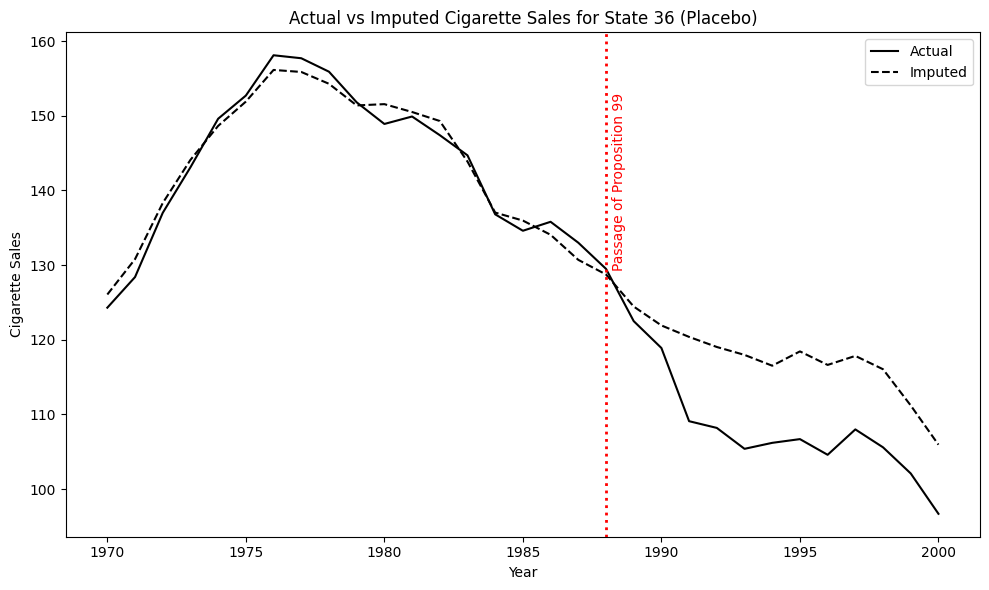

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1970,2001), merged_last_rows_df["O_placebo"], color='black', label='Actual', linestyle='-')
plt.plot(np.arange(1970,2001), merged_last_rows_df["M_placebo"], color='black', label='Imputed', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Cigarette Sales')
plt.title('Actual vs Imputed Cigarette Sales for State 36 (Placebo)')
plt.legend()
plt.axvline(x=1988, color='red', linestyle=':', linewidth=2)
plt.text(1988 + 0.2, plt.ylim()[1]*0.95, "Passage of Proposition 99", color='red', rotation=90, va='top')
plt.tight_layout()
plt.show()

In [84]:
# Placebo test for State 39 (37)
O_placebo = O[:-1]
Z = np.zeros_like(O_placebo) # Z has the same shape as O
Z[37, 19:] = 1

In [85]:
M, a, b, tau = MC_NNM_with_cross_validation(O_placebo, 1-Z)
M_broadcasted = M + a + b.T
merged_last_rows = np.vstack([O[37, :], M_broadcasted[37, :]])
merged_last_rows_df = pd.DataFrame({
    'O_placebo': merged_last_rows[0],
    'M_placebo': merged_last_rows[1]
})
merged_last_rows_df

/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: divide by zero encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: overflow encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:15: RuntimeWarning: invalid value encountered in matmul
  A = M @ M.T # this will speed up the calculation when M is asymmetric
/Users/wooyongpark/Dropbox/01 Coursework/02 Stat/08 Deep Learning/final-project/.venv/lib/python3.10/site-packages/causaltensor/matlib/util.py:20: RuntimeWarning: divide by zero encountered i

,O_placebo,M_placebo
0,132.199997,130.328720
1,131.699997,132.265576
2,140.000000,140.629175
3,141.199997,144.998335
4,145.800003,149.346264
5,160.699997,156.497632
6,161.500000,162.514099
7,160.399994,160.766700
8,160.300003,159.432343
9,168.600006,157.602204


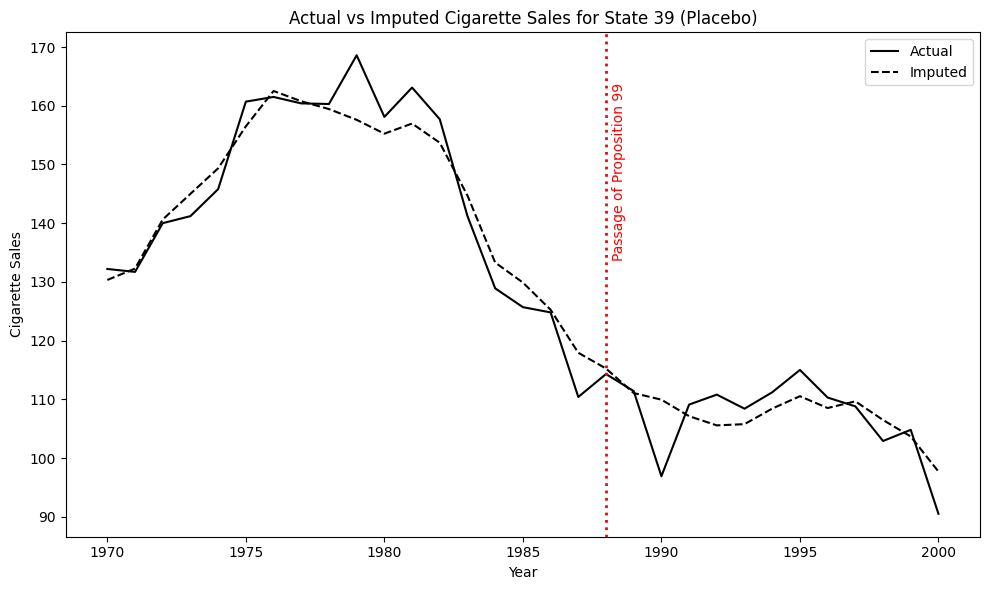

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1970,2001), merged_last_rows_df["O_placebo"], color='black', label='Actual', linestyle='-')
plt.plot(np.arange(1970,2001), merged_last_rows_df["M_placebo"], color='black', label='Imputed', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Cigarette Sales')
plt.title('Actual vs Imputed Cigarette Sales for State 39 (Placebo)')
plt.legend()
plt.axvline(x=1988, color='red', linestyle=':', linewidth=2)
plt.text(1988 + 0.2, plt.ylim()[1]*0.95, "Passage of Proposition 99", color='red', rotation=90, va='top')
plt.tight_layout()
plt.show()